## Predict which passengers are transported to an alternate dimension

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [448]:
df = pd.read_csv('./train.csv')

In [449]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


__PassengerId__ - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

__HomePlanet__ - The planet the passenger departed from, typically their planet of permanent residence.

__CryoSleep__ - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. 
Passengers in cryosleep are confined to their cabins.

__Cabin__ - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

__Destination__ - The planet the passenger will be debarking to.

__Age__ - The age of the passenger.

__VIP__ - Whether the passenger has paid for special VIP service during the voyage. 

__RoomService, FoodCourt, ShoppingMall, Spa, VRDeck__ - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

__Name__ - The first and last names of the passenger.

__Transported__ - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Data Validation and quality Check

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [451]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [452]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

## EDA

In [453]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [454]:
(df.isnull().sum() / df.shape[0]) * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

Apply 5% rule to eliminate missing value

In [455]:
n_feature = [a for a in df.columns if df[a].dtypes == 'float64']
n_feature

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

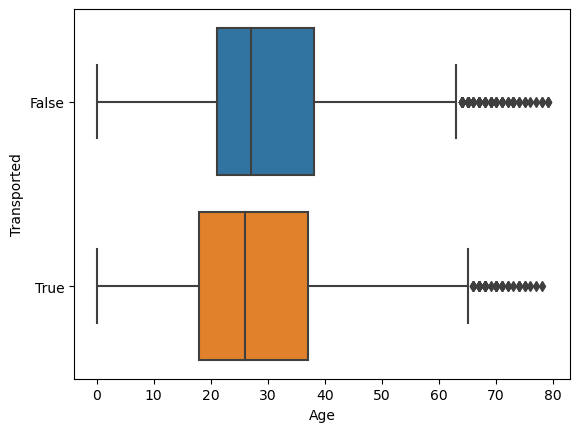

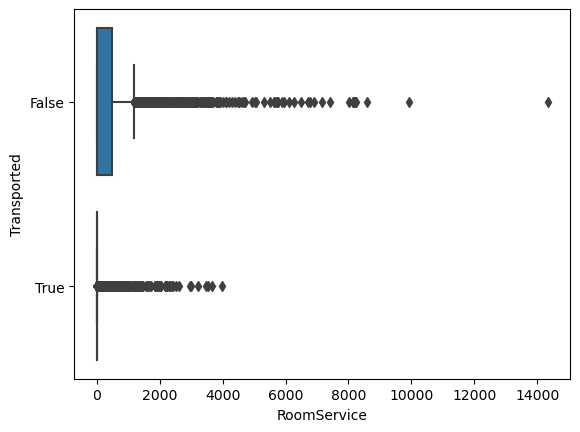

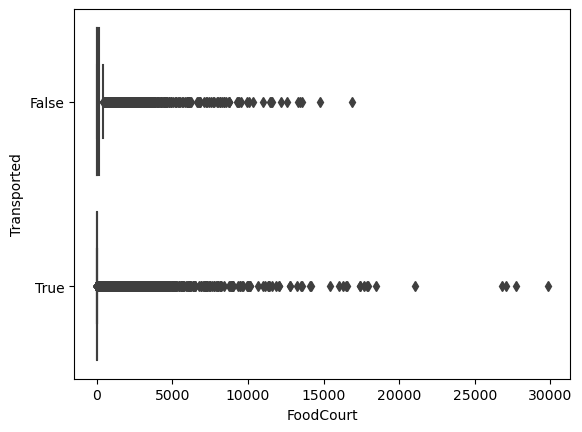

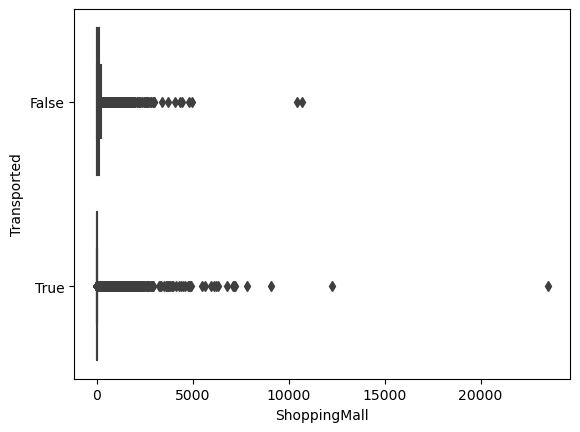

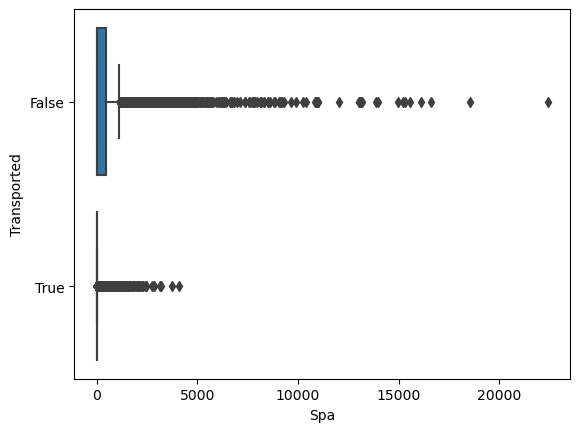

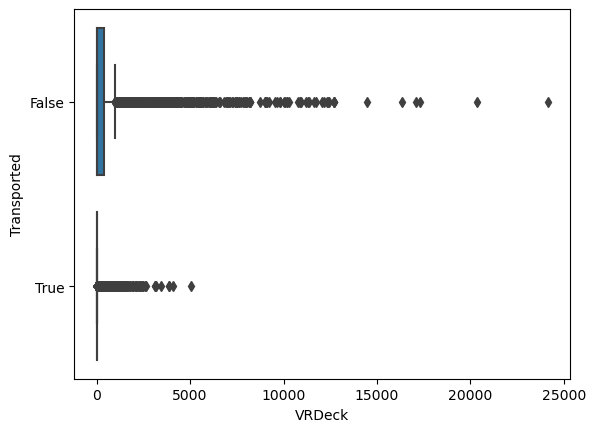

In [456]:
for f in n_feature:
    sns.boxplot(x=df[f], y=df['Transported'].astype('str'))
    plt.show()

In [457]:
df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1,inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,Celeon Hontichre,False


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

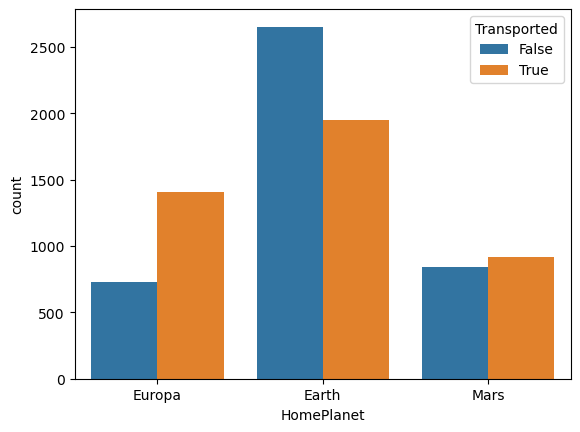

In [458]:
sns.countplot(x=df['HomePlanet'], hue = df['Transported'])

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

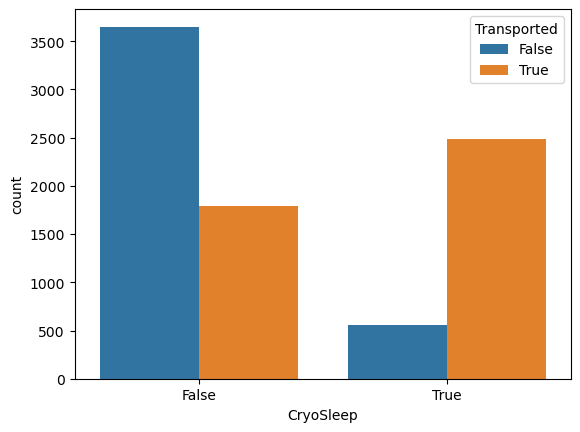

In [459]:
sns.countplot(x=df['CryoSleep'], hue = df['Transported'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

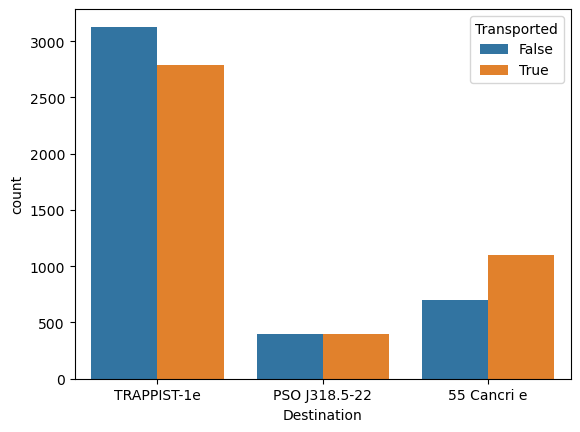

In [460]:
sns.countplot(x=df['Destination'], hue = df['Transported'])

<AxesSubplot:xlabel='VIP', ylabel='count'>

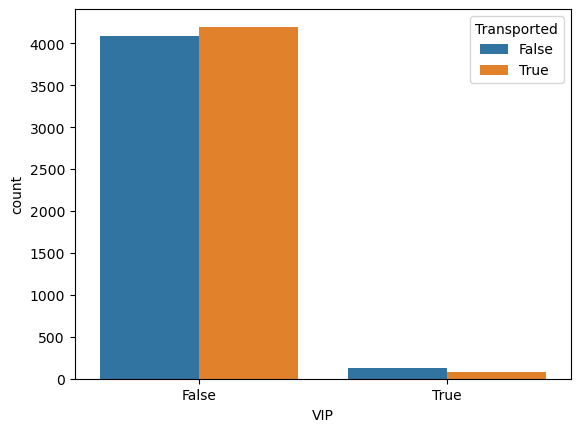

In [461]:
sns.countplot(x=df['VIP'], hue = df['Transported'])

In [462]:
df.drop(['Name', 'VIP'], axis=1,inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,True
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False


In [463]:
df[['deck','num','side']]= df.Cabin.str.split('/', expand=True)

In [464]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,Transported,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,E,608,S


In [465]:
df.drop(['Cabin','num'], axis=1, inplace=True)

In [466]:
x=df.groupby(['deck','Transported']).count()
y=df.groupby(['deck']).count()
r=((x/y)*100).round(2)
r[['PassengerId']]


PassengerId
deck Transported             
A    False              50.39
     True               49.61
B    False              26.57
     True               73.43
C    False              31.99
     True               68.01
D    False              56.69
     True               43.31
E    False              64.27
     True               35.73
F    False              56.01
     True               43.99
G    False              48.38
     True               51.62
T    False              80.00
     True               20.00

In [467]:
res = df.pivot_table(index='deck', columns='Transported', aggfunc='count', fill_value=0)

In [468]:
res['PassengerId'][False] / res['PassengerId'][True]

deck
A    1.015748
B    0.361888
C    0.470472
D    1.309179
E    1.798722
F    1.273393
G    0.937169
T    4.000000
dtype: float64

Aprart from deck 'A' the ratio of other deck barely close to 1. So there could be a certain relationship between deck and transported

In [469]:
res2 = df.pivot_table(index='side', columns='Transported', aggfunc='count', fill_value=0)

In [470]:
res2['PassengerId'][False] / res2['PassengerId'][True]

side
P    1.216017
S    0.801681
dtype: float64

S side has more transported passenger ratio

In [471]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,Transported,deck,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,True,F,S
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,False,A,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,G,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,True,G,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,E,S


In [472]:

df.dropna(inplace=True)

In [473]:
df.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
Transported    0
deck           0
side           0
dtype: int64

In [474]:
df.shape

(7751, 8)

In [475]:
q1, q3 = df.Age.quantile([.25,.75])

iqr = q3 - q1
l_fence = 0
u_fence = q3 + (1.5 * iqr)

In [476]:
df = df[(df.Age >= l_fence) & (df.Age <= u_fence)]

In [477]:
df.drop('PassengerId', inplace=True,axis=1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10780\50387241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('PassengerId', inplace=True,axis=1)


In [478]:
x = df.drop(['Transported','Age'], axis=1)
dummies = pd.get_dummies(x)

In [479]:
x = pd.concat([dummies, df['Age']], axis=1)

In [480]:
x

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S,Age
0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,39.0
1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,24.0
2,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,58.0
3,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,33.0
4,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,41.0
8689,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,18.0
8690,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,26.0
8691,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,32.0


In [481]:
y = df['Transported']

In [482]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [483]:
test = pd.read_csv('./test.csv')

In [484]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [485]:
PassengerId = test['PassengerId']

In [486]:
age = test['Age']

In [487]:
age.isnull().sum()

91

In [488]:
x.mean()

HomePlanet_Earth              0.545431
HomePlanet_Europa             0.248894
HomePlanet_Mars               0.205676
CryoSleep_False               0.643843
CryoSleep_True                0.356157
Destination_55 Cancri e       0.212575
Destination_PSO J318.5-22     0.094246
Destination_TRAPPIST-1e       0.693179
deck_A                        0.030200
deck_B                        0.092554
deck_C                        0.087998
deck_D                        0.056366
deck_E                        0.102057
deck_F                        0.328300
deck_G                        0.302135
deck_T                        0.000391
side_P                        0.495314
side_S                        0.504686
Age                          28.438427
dtype: float64

In [489]:
age = age.fillna(28.438427)

In [490]:
age.isnull().sum()

0

In [491]:
test.drop(['PassengerId','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'], axis=1, inplace=True)

In [492]:
test[['deck','num','side']] = test.Cabin.str.split('/', expand=True)

In [493]:
test.drop('num', axis=1, inplace=True)

In [494]:
test.drop('Cabin', axis=1, inplace=True)

In [495]:
dm = pd.get_dummies(test)

In [496]:
dm

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
4273,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4274,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
4275,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [497]:
test = pd.concat([dm, age], axis=1)

In [498]:
test

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S,Age
0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,27.000000
1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,19.000000
2,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,31.000000
3,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,38.000000
4,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,34.000000
4273,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,42.000000
4274,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,28.438427
4275,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,28.438427


In [499]:
tr = model.predict(test)

In [500]:
tr = pd.DataFrame(tr, columns=['Transported'])

In [501]:
output = pd.concat([PassengerId, tr], axis=1)

In [502]:
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [503]:
output.to_csv('sample_submission.csv',index=False)

In [504]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x, y)

DecisionTreeClassifier()

In [505]:
pr_tree = tree.predict(test)

In [506]:
pr_tree = pd.DataFrame(pr_tree, columns=['Transported'])

In [507]:
output = pd.concat([PassengerId, pr_tree], axis=1)

In [508]:
output.to_csv('sample_submission.csv',index=False)

In [509]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x, y)

RandomForestClassifier()

In [510]:
pr_fst = clf.predict(test)
pr_fst = pd.DataFrame(pr_fst, columns=['Transported'])

In [511]:
output = pd.concat([PassengerId, pr_fst], axis=1)
output.to_csv('sample_submission.csv',index=False)